In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [2]:
# select dataset world development indicators
data = pd.read_csv('../Week5-Visualization/Week5-Visualization/world-development-indicators/Indicators.csv')

In [19]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [26]:
data[["IndicatorName", "IndicatorCode"]][150:200]

,IndicatorName,IndicatorCode
150,"Population, total",SP.POP.TOTL
151,Rural population,SP.RUR.TOTL
152,Rural population (% of total population),SP.RUR.TOTL.ZS
153,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS
154,"Survival to age 65, male (% of cohort)",SP.DYN.TO65.MA.ZS
155,Urban population,SP.URB.TOTL
156,Urban population (% of total),SP.URB.TOTL.IN.ZS
157,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT
158,Age dependency ratio (% of working-age population),SP.POP.DPND
159,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL


In [56]:
# select Livestock for Ghana
hist_indicator1 = 'AG.PRD.LVSK.XD'
hist_country = 'GHA'

# mask selected
mask1 = data['IndicatorCode'].str.contains(hist_indicator1) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching Ghana for country code and Livestock over time.
stage1 = data[mask1 & mask2]

# select CO2 emissions for Ghana
hist_indicator2 = 'EN.ATM.CO2E.KT'
#hist_country = 'GHA'

mask3 = data['IndicatorCode'].str.contains(hist_indicator2) 
mask4 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching Ghana for country code and CO2 emissions over time.
stage2 = data[mask3 & mask4]

In [57]:
# select time period between 1961 and 2011
stage1_cut = stage1[stage1['Year'] < 2012]
stage2_cut = stage2[stage2['Year'] > 1960]

# check length of both datasets
print(len(stage1_cut))
print(len(stage2_cut))

51
51


In [58]:
# check head and tail of both datasets for start and end date
print(stage1_cut.head(1))
print(stage2_cut.head(1))
print(stage1_cut.tail(1))
print(stage2_cut.tail(1))

      CountryName CountryCode                                 IndicatorName  \
34902  Ghana       GHA         Livestock production index (2004-2006 = 100)   

        IndicatorCode  Year  Value  
34902  AG.PRD.LVSK.XD  1961  27.27  
      CountryName CountryCode       IndicatorName   IndicatorCode  Year  \
34834  Ghana       GHA         CO2 emissions (kt)  EN.ATM.CO2E.KT  1961   

          Value  
34834  1345.789  
        CountryName CountryCode                                 IndicatorName  \
5101511  Ghana       GHA         Livestock production index (2004-2006 = 100)   

          IndicatorCode  Year   Value  
5101511  AG.PRD.LVSK.XD  2011  127.51  
        CountryName CountryCode       IndicatorName   IndicatorCode  Year  \
5101115  Ghana       GHA         CO2 emissions (kt)  EN.ATM.CO2E.KT  2011   

             Value  
5101115  10080.583  


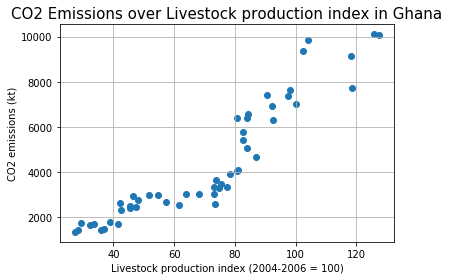

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('CO2 Emissions over Livestock production index in Ghana',fontsize=15)
axis.set_xlabel(stage1['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)


X = stage1_cut['Value']
Y = stage2_cut['Value']

axis.scatter(X, Y)
plt.show()

In [33]:
# select Livestock for Ghana
hist_indicator1 = 'AG.PRD.LVSK.XD'
hist_country = 'GHA'

# mask selected
mask1 = data['IndicatorCode'].str.contains(hist_indicator1) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching Ghana for country code and Livestock over time.
stage1 = data[mask1 & mask2]

# select Life expectancy at birth, total (years)
hist_indicator3 = 'SP.DYN.LE00.IN'
#hist_country = 'GHA'

mask5 = data['IndicatorCode'].str.contains(hist_indicator3) 
mask6 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching Ghana for country code and CO2 emissions over time.
stage3 = data[mask5 & mask6]

In [50]:
# select time period between 1961 and 2011
stage1_cut = stage1[stage1['Year'] < 2014]
stage3_cut = stage3[stage3['Year'] > 1960]

# check length of both datasets
print(len(stage1_cut))
print(len(stage3_cut))

53
53


In [52]:
# check head and tail of both datasets for start and end date
print(stage1_cut.head(1))
print(stage3_cut.head(1))
print(stage1_cut.tail(1))
print(stage3_cut.tail(1))

      CountryName CountryCode                                 IndicatorName  \
34902  Ghana       GHA         Livestock production index (2004-2006 = 100)   

        IndicatorCode  Year  Value  
34902  AG.PRD.LVSK.XD  1961  27.27  
      CountryName CountryCode                            IndicatorName  \
34901  Ghana       GHA         Life expectancy at birth, total (years)   

        IndicatorCode  Year      Value  
34901  SP.DYN.LE00.IN  1961  46.266707  
        CountryName CountryCode                                 IndicatorName  \
5444429  Ghana       GHA         Livestock production index (2004-2006 = 100)   

          IndicatorCode  Year   Value  
5444429  AG.PRD.LVSK.XD  2013  136.05  
        CountryName CountryCode                            IndicatorName  \
5444424  Ghana       GHA         Life expectancy at birth, total (years)   

          IndicatorCode  Year      Value  
5444424  SP.DYN.LE00.IN  2013  61.142073  


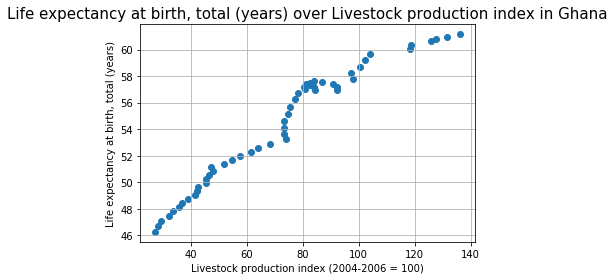

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Life expectancy at birth, total (years) over Livestock production index in Ghana',fontsize=15)
axis.set_xlabel(stage1['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage3['IndicatorName'].iloc[0],fontsize=10)


X = stage1_cut['Value']
Y = stage3_cut['Value']

axis.scatter(X, Y)
plt.show()